In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def polynom(x):
  y = 100*x+10*x**2+x**3+0.1*x**4+0.01*x**5-0.01*x**7
  #y = x**2
  return y

In [4]:
train_set = {}

for x in range(-10, 10):
  y = polynom(x)
  train_set[x] = y

x,y = zip(*sorted(train_set.items()))

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 741242560.0000 - mae: 12461.7490 - acc: 0.0000e+00
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 741194688.0000 - mae: 12461.1953 - acc: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 741164864.0000 - mae: 12460.7559 - acc: 0.0500
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 741132288.0000 - mae: 12460.3809 - acc: 0.0500
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 741105792.0000 - mae: 12460.2109 - acc: 0.0500
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 741086592.0000 - mae: 12460.0469 - acc: 0.0500
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 741066752.0000 - mae: 12459.7988 - acc: 0.0500
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 741047808.0000 - mae: 12459.5752 - acc: 0.0500
Epoch 9/2000
1/1 [=======================

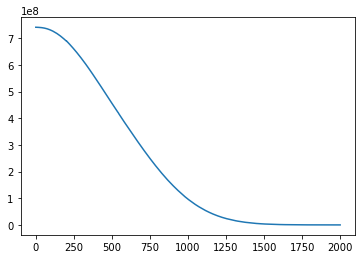

In [5]:
model = tf.keras.models.Sequential([
  keras.layers.BatchNormalization(),
  keras.layers.Dense(units=10, activation='LeakyReLU'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(units=10, activation='LeakyReLU'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(units=10, activation='LeakyReLU'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(units=1, activation='linear'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03), loss='mean_squared_error', metrics=["mae", "acc"])

xs = np.array(x, dtype=float)
ys = np.array(y, dtype=float)
history = model.fit(xs, ys, epochs=2000)

plt.plot(history.history["loss"])
plt.show()

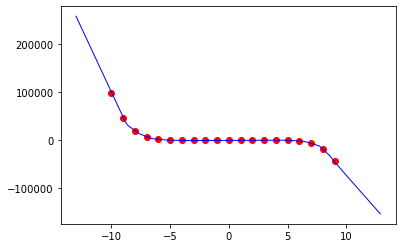

In [6]:
plt.plot(x,y, linewidth=0, color='red', marker="o")

x_pred = np.arange(-13, 13, 0.1).tolist()
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, linewidth=1, color='blue')

plt.show()